## Setting Up:

In [ ]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), '../../')) # Add root of repo to import MBM

import pandas as pd
import os
import warnings
from tqdm.notebook import tqdm
import zipfile
import cdsapi
import numpy as np
import glob
import xarray as xr
import matplotlib.pyplot as plt
import massbalancemachine as mbm

from scripts.config_NOR import *

warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

cfg = mbm.NorwayConfig(dataPath='/home/mburlet/scratch/data/DATA_MB/WGMS/Norway/')

In [ ]:
from scripts.config_IT_AT import *

warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

cfg = mbm.ItalyAustriaConfig(dataPath='/home/mburlet/scratch/data/DATA_MB/WGMS/IT_AT/')

## Download monthly ERA5-Land variables:

To download ERA5-Land data you need to configure your API client first. For this, follow these instructions: https://forum.ecmwf.int/t/step-by-step-instructions-on-how-to-download-data-using-new-climate-data-store-beta-cds-beta/3743. 

To summarize instructions: 
- Your existing CDS credentials will not work in CDS-Beta, you need to have an ECMWF account - register one here: https://www.ecmwf.int/. 
- Once you have set up an account, make sure that you accepted licences in the Download form of the product page: https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land-monthly-means?tab=download. 
- Make sure that you are logged in ECMWF then navigate to the CDSAPI setup page to copy the content for your .cdsapirc file: https://cds.climate.copernicus.eu/how-to-api. 

Once this is set up, you should be able to download the ERA5-Land data using our script. 

In [ ]:
RUN = True
if RUN:
    os.makedirs(cfg.dataPath + path_ERA5_raw, exist_ok=True)
    c = cdsapi.Client()

    # climate variables
    c.retrieve(
        'reanalysis-era5-land-monthly-means', {
            'product_type': ['monthly_averaged_reanalysis'],
            'variable': [
                '10m_u_component_of_wind',
                '10m_v_component_of_wind',
                '2m_temperature',
                'forecast_albedo',
                'snow_cover',
                'snow_density',
                'snow_depth_water_equivalent',
                'snowfall',
                'snowmelt',
                'surface_latent_heat_flux',
                'surface_net_thermal_radiation',
                'surface_sensible_heat_flux',
                'surface_solar_radiation_downwards',
                'total_precipitation',
            ],
            'year': [
                '1950',
                '1951',
                '1952',
                '1953',
                '1954',
                '1955',
                '1956',
                '1957',
                '1958',
                '1959',
                '1960',
                '1961',
                '1962',
                '1963',
                '1964',
                '1965',
                '1966',
                '1967',
                '1968',
                '1969',
                '1970',
                '1971',
                '1972',
                '1973',
                '1974',
                '1975',
                '1976',
                '1977',
                '1978',
                '1979',
                '1980',
                '1981',
                '1982',
                '1983',
                '1984',
                '1985',
                '1986',
                '1987',
                '1988',
                '1989',
                '1990',
                '1991',
                '1992',
                '1993',
                '1994',
                '1995',
                '1996',
                '1997',
                '1998',
                '1999',
                '2000',
                '2001',
                '2002',
                '2003',
                '2004',
                '2005',
                '2006',
                '2007',
                '2008',
                '2009',
                '2010',
                '2011',
                '2012',
                '2013',
                '2014',
                '2015',
                '2016',
                '2017',
                '2018',
                '2019',
                '2020',
                '2021',
                '2022',
                '2023',
                '2024',
            ],
            'month': [
                '01',
                '02',
                '03',
                '04',
                '05',
                '06',
                '07',
                '08',
                '09',
                '10',
                '11',
                '12',
            ],
            'time': ['00:00'],
            "data_format":
            "netcdf",
            "download_format":
            "zip",
            'area': [   # Norway and Switerland
                72,    # North latitude
                0,     # West longitude
                42,    # South latitude
                32,    # East longitude
            ]
        }, cfg.dataPath + path_ERA5_raw + 'download.netcdf.zip')
    with zipfile.ZipFile(cfg.dataPath + path_ERA5_raw + 'download.netcdf.zip', 'r') as zip:
        zip.extractall(cfg.dataPath + path_ERA5_raw)
        
    
    # geopot from era5-land reanalysis directly (new product with better resolution)
    # download it separately so that the pipeline still works
    c.retrieve(
        'reanalysis-era5-land-monthly-means', {
            "variable": ["geopotential"],
            "data_format": "netcdf",
            "download_format": "zip",
            'area': [  # Norway and Switerland 
                72,    # North latitude
                0,     # West longitude
                42,    # South latitude
                32,    # East longitude
            ]
        }, cfg.dataPath + path_ERA5_raw + 'download_geopot.netcdf.zip')
    with zipfile.ZipFile(cfg.dataPath + path_ERA5_raw + 'download_geopot.netcdf.zip', 'r') as zip:
        zip.extractall(cfg.dataPath + path_ERA5_raw)

"""
NORWAY
'area': [
                72,    # North latitude
                4,     # West longitude
                57,    # South latitude
                32,    # East longitude
            ]
"""

2025-06-03 12:54:07,203 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-06-03 12:54:07,483 INFO Request ID is 69f24849-0c08-4238-bd6a-1c62a341f235
2025-06-03 12:54:07,587 INFO status has been updated to accepted
2025-06-03 12:54:18,494 INFO status has been updated to running
2025-06-03 13:44:29,050 INFO status has been updated to successful


2878a00636726f20e6dc7ccb899b4bbc.zip:   0%|          | 0.00/1.57G [00:00<?, ?B/s]

Recovering from connection error [HTTPSConnectionPool(host='cds.climate.copernicus.eu', port=443): Read timed out. (read timeout=60)], attemps 1 of 500
Retrying in 120 seconds
2025-06-03 14:31:12,111 INFO Request ID is f4d9657d-70c1-43ba-ae91-95c2956182b2
2025-06-03 14:31:12,388 INFO status has been updated to accepted
2025-06-03 14:31:26,575 INFO status has been updated to running
2025-06-03 14:31:47,920 INFO status has been updated to successful


dbeab71b5d461b7183bf5ca6d0785d4e.zip:   0%|          | 0.00/767k [00:00<?, ?B/s]

"\nNORWAY\n'area': [\n                72,    # North latitude\n                4,     # West longitude\n                57,    # South latitude\n                32,    # East longitude\n            ]\n"

In [ ]:
! ls "{cfg.dataPath + path_ERA5_raw}"

data_stream-moda.nc  download_geopot.netcdf.zip
download.netcdf.zip  geo.area-subset.72.32.42.0.nc


In [ ]:
# Correct era5 data
dc = xr.open_dataset(cfg.dataPath + path_ERA5_raw + 'data_stream-moda.nc')
dc2 = dc.rename(
    {'valid_time': 'time'}
)  # Coordinates have changed recently in the API, this is to keep compatibility with our code

# delete file if already exists
if os.path.exists(cfg.dataPath + path_ERA5_raw + 'era5_monthly_averaged_data_NOR_CH.nc'):
    os.remove(cfg.dataPath + path_ERA5_raw + 'era5_monthly_averaged_data_NOR_CH.nc')
dc2.to_netcdf(cfg.dataPath + path_ERA5_raw + "era5_monthly_averaged_data_NOR_CH.nc")

# change name of geopotential file: 
dc = xr.open_dataset(cfg.dataPath + path_ERA5_raw + 'geo.area-subset.72.32.42.0.nc')
# delete file if already exists
if os.path.exists(cfg.dataPath + path_ERA5_raw + 'era5_geopotential_pressure_NOR_CH.nc'):
    os.remove(cfg.dataPath + path_ERA5_raw + 'era5_geopotential_pressure_NOR_CH.nc')
dc.to_netcdf(cfg.dataPath + path_ERA5_raw + "era5_geopotential_pressure_NOR_CH.nc")

# delete old files
os.remove(cfg.dataPath + path_ERA5_raw + 'download.netcdf.zip')
os.remove(cfg.dataPath + path_ERA5_raw + 'data_stream-moda.nc')
os.remove(cfg.dataPath + path_ERA5_raw+'download_geopot.netcdf.zip')
os.remove(cfg.dataPath + path_ERA5_raw+'geo.area-subset.72.32.42.0.nc')

In [ ]:
! ls "{cfg.dataPath + path_ERA5_raw}"

era5_geopotential_pressure_NOR_CH.nc  era5_monthly_averaged_data_NOR_CH.nc


### Check geopotential data:

In [ ]:
geopot_era5 = xr.open_dataset(cfg.dataPath + path_ERA5_raw + 'era5_geopotential_pressure_NOR_CH.nc')
display(geopot_era5)

display(xr.open_dataset(cfg.dataPath + path_ERA5_raw + 'era5_monthly_averaged_data_NOR_CH.nc'))

<xarray.Dataset> Size: 775kB
Dimensions:    (time: 1, latitude: 301, longitude: 321)
Coordinates:
  * longitude  (longitude) float32 1kB 0.0 0.1 0.2 0.3 ... 31.7 31.8 31.9 32.0
  * latitude   (latitude) float32 1kB 72.0 71.9 71.8 71.7 ... 42.2 42.1 42.0
  * time       (time) datetime64[ns] 8B 2013-08-09T12:00:00
Data variables:
    z          (time, latitude, longitude) float64 773kB ...
Attributes:
    Conventions:               CF-1.6
    history:                   Fri Jun 12 14:41:56 2020: ncpdq -U geo_1279l4_...
    NCO:                       4.7.2
    nco_openmp_thread_number:  1

<xarray.Dataset> Size: 5GB
Dimensions:    (time: 900, latitude: 301, longitude: 321)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2024-12-01
  * latitude   (latitude) float64 2kB 72.0 71.9 71.8 71.7 ... 42.2 42.1 42.0
  * longitude  (longitude) float64 3kB 0.0 0.1 0.2 0.3 ... 31.7 31.8 31.9 32.0
    expver     (time) <U4 14kB ...
Data variables: (12/14)
    u10        (time, latitude, longitude) float32 348MB ...
    v10        (time, latitude, longitude) float32 348MB ...
    t2m        (time, latitude, longitude) float32 348MB ...
    fal        (time, latitude, longitude) float32 348MB ...
    snowc      (time, latitude, longitude) float32 348MB ...
    rsn        (time, latitude, longitude) float32 348MB ...
    ...         ...
    smlt       (time, latitude, longitude) float32 348MB ...
    slhf       (time, latitude, longitude) float32 348MB ...
    str        (time, latitude, longitude) float32 348MB ...
    sshf       (time, latitude, longitude) float32 348MB ...
    ssrd       (time, latitude, longitude) float32 348MB ...
    tp         (time, latitude, longitude) float32 348MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-03T11:30 GRIB to CDM+CF via cfgrib-0.9.1...

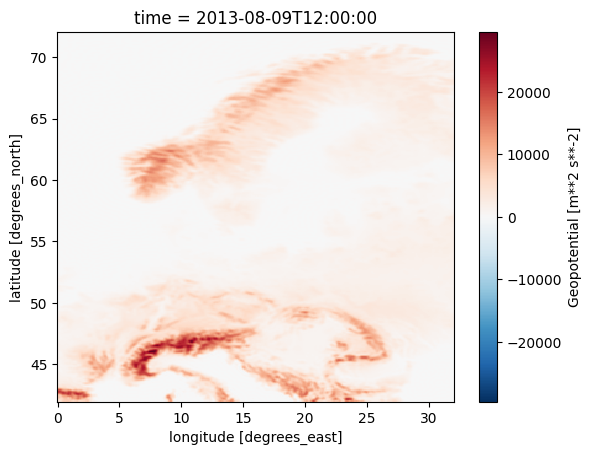

In [6]:
# plot geopot
geopot_era5.z.plot()

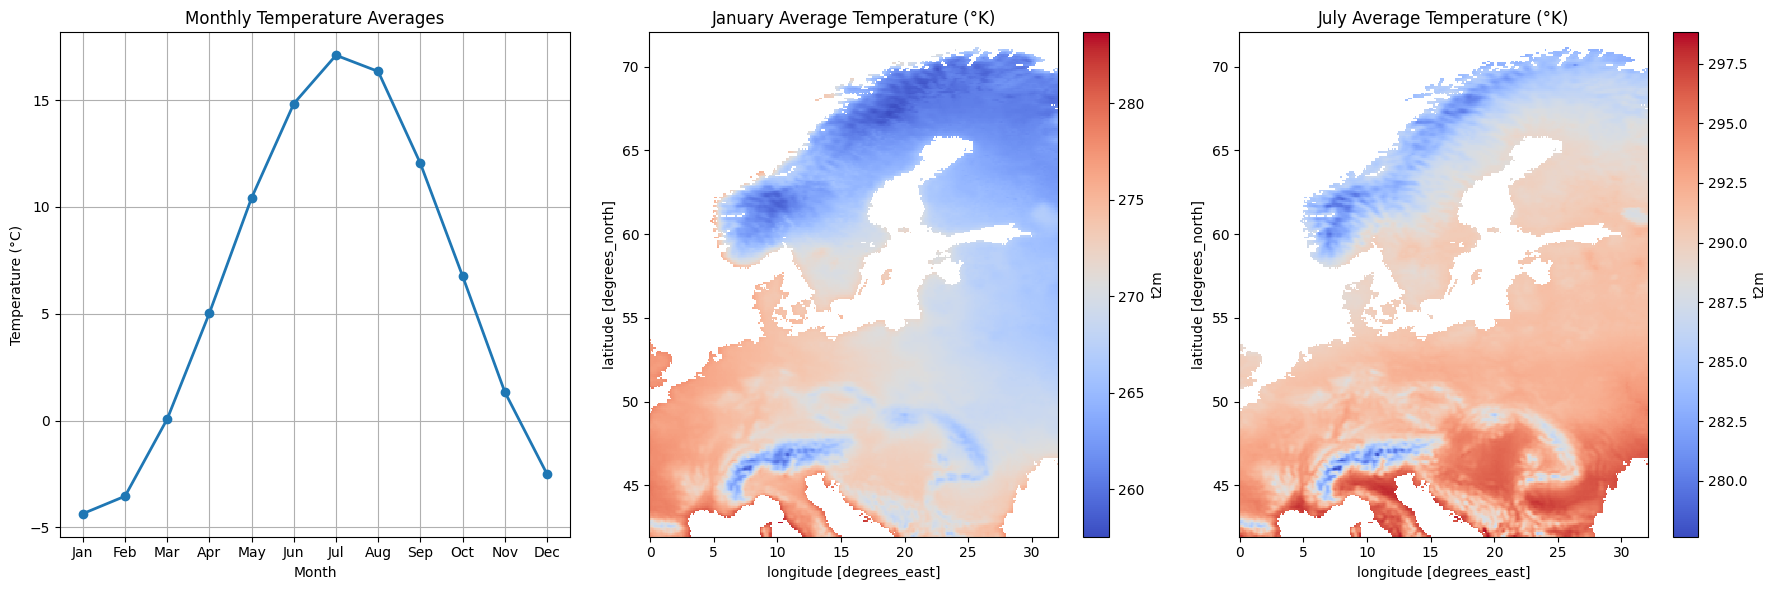

In [ ]:
ds = xr.open_dataset(cfg.dataPath + path_ERA5_raw + 'era5_monthly_averaged_data_NOR_CH.nc')
temp_var = 't2m'

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 1. Monthly temperature averages
times = pd.to_datetime(ds.time.values)
months = [t.month for t in times]

# Group by month
month_groups = {m: [] for m in range(1, 13)}
for i, m in enumerate(months):
    month_groups[m].append(i)

# Calculate monthly means
monthly_means = []
for m in range(1, 13):
    if month_groups[m]:
        mean_temp = ds[temp_var].isel(time=month_groups[m]).mean().values
        if hasattr(ds[temp_var], 'units') and ds[temp_var].units == 'K':
            mean_temp -= 273.15
        monthly_means.append(float(mean_temp))
    else:
        monthly_means.append(np.nan)

# Plot monthly averages
axs[0].plot(range(1, 13), monthly_means, 'o-', color='#1f77b4', linewidth=2)
axs[0].set_title('Monthly Temperature Averages')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Temperature (°C)')
axs[0].grid(True)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axs[0].set_xticks(range(1, 13))
axs[0].set_xticklabels(month_names)

# 2. January temperature map
jan_indices = [i for i, t in enumerate(times) if t.month == 1]
if jan_indices:
    jan_temp = ds[temp_var].isel(time=jan_indices).mean(dim='time')
    if hasattr(jan_temp, 'units') and jan_temp.units == 'K':
        jan_temp -= 273.15
    jan_temp.plot(ax=axs[1], cmap='coolwarm')
    axs[1].set_title('January Average Temperature (°K)')

# 3. July temperature map
jul_indices = [i for i, t in enumerate(times) if t.month == 7]
if jul_indices:
    jul_temp = ds[temp_var].isel(time=jul_indices).mean(dim='time')
    if hasattr(jul_temp, 'units') and jul_temp.units == 'K':
        jul_temp -= 273.15
    jul_temp.plot(ax=axs[2], cmap='coolwarm')
    axs[2].set_title('July Average Temperature (°K)')

plt.tight_layout()
plt.show()